In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
data = pd.read_csv('../src/data/TEI_BRS_data - Sheet1.csv')
data.head()

,ID,Age,Gender,College,Global score,Well-being,Self-Control,Emotionality,Sociability,BRS,TEI_Mean,BRS_Mean
0,1,18,3,2,4.13,2.83,4.33,4.50,4.67,4.33,4.09,4.33
1,2,22,2,2,3.57,3.83,3.67,2.63,4.33,3.00,3.61,3.00
2,3,22,1,3,4.67,5.50,4.83,4.75,3.83,3.33,4.72,3.33
3,4,19,2,2,5.10,5.17,4.83,5.13,5.00,3.50,5.05,3.50
4,5,23,2,7,4.80,5.50,4.00,5.13,4.67,2.83,4.82,2.83


Text(0.5, 0, 'Age')

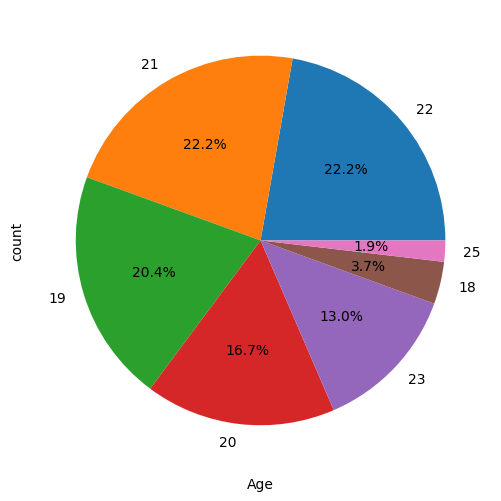

In [5]:
plot = data["Age"].value_counts().plot(kind="pie", figsize=(6,6), autopct="%1.1f%%")
plot.set_xlabel('Age')

In [6]:
gender_mapping = {1: "Male", 2: "Female", 3: "Other"}
data['Gender'] = data["Gender"].map(gender_mapping)
data.head()

,ID,Age,Gender,College,Global score,Well-being,Self-Control,Emotionality,Sociability,BRS,TEI_Mean,BRS_Mean
0,1,18,Other,2,4.13,2.83,4.33,4.50,4.67,4.33,4.09,4.33
1,2,22,Female,2,3.57,3.83,3.67,2.63,4.33,3.00,3.61,3.00
2,3,22,Male,3,4.67,5.50,4.83,4.75,3.83,3.33,4.72,3.33
3,4,19,Female,2,5.10,5.17,4.83,5.13,5.00,3.50,5.05,3.50
4,5,23,Female,7,4.80,5.50,4.00,5.13,4.67,2.83,4.82,2.83


Text(0.5, 1.0, 'Gender Distribution')

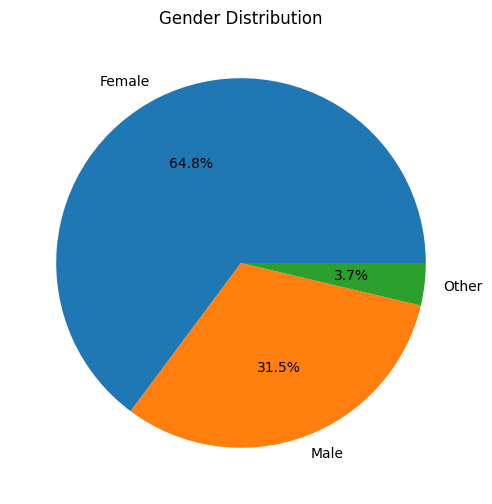

In [7]:
pie = data["Gender"].value_counts().plot(kind="pie", figsize=(6,6), autopct="%1.1f%%")
pie.set_ylabel("")
plt.title("Gender Distribution")

In [8]:
gender_counts = data["Gender"].value_counts()
gender_percentage = (gender_counts / len(data)) * 100
# gender_percentage = gender_percentage.round(2).astype(str) + "%"
gender_summary = pd.DataFrame({'Gender': gender_counts.index, 'Frequency': gender_counts.values, 'Percentage': gender_percentage.values})
gender_summary = gender_summary.sort_values(by="Frequency", ascending=False)
total_row = pd.DataFrame({'Gender': ['Total'], 'Frequency': [gender_counts.sum()], 'Percentage': [gender_percentage.sum()]})
gender_summary = pd.concat([gender_summary, total_row], ignore_index=True)
gender_summary


,Gender,Frequency,Percentage
0,Female,35,64.814815
1,Male,17,31.481481
2,Other,2,3.703704
3,Total,54,100.000000


In [9]:
data.head()

,ID,Age,Gender,College,Global score,Well-being,Self-Control,Emotionality,Sociability,BRS,TEI_Mean,BRS_Mean
0,1,18,Other,2,4.13,2.83,4.33,4.50,4.67,4.33,4.09,4.33
1,2,22,Female,2,3.57,3.83,3.67,2.63,4.33,3.00,3.61,3.00
2,3,22,Male,3,4.67,5.50,4.83,4.75,3.83,3.33,4.72,3.33
3,4,19,Female,2,5.10,5.17,4.83,5.13,5.00,3.50,5.05,3.50
4,5,23,Female,7,4.80,5.50,4.00,5.13,4.67,2.83,4.82,2.83


Text(0.5, 1.0, 'College Distribution')

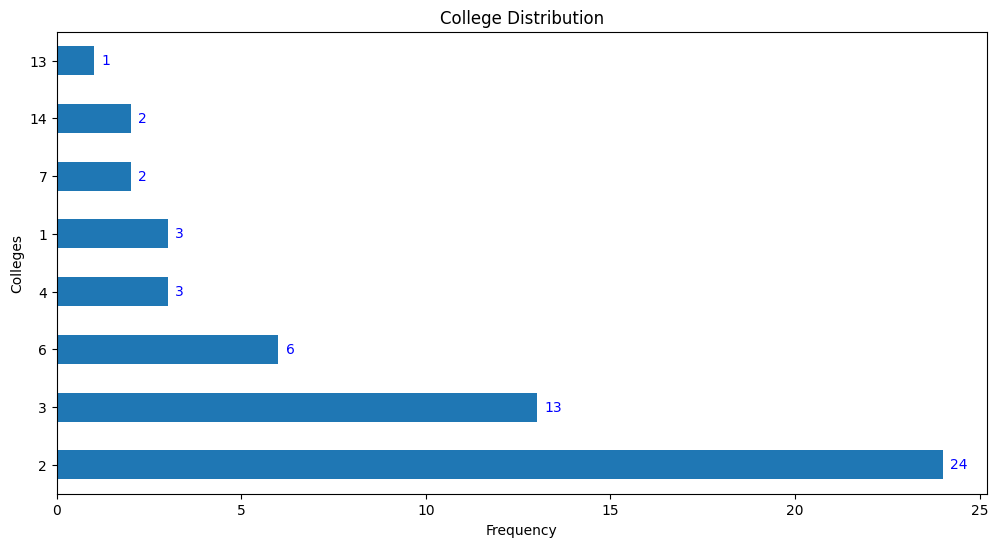

In [10]:
college_mapping = {1: "College of Agriculture", 2: "College of Arts and Sciences", 3: "College of Business and Administration", 4: "College of Computer Studies", 5: "Divinity School", 6: "College of Education", 7: "College of Engineering and Design", 8: "College of Mass Communication", 9: "Medical School", 10: "College of Nursing", 11: "College of Performing and Visual Arts", 12: "Graduate Program", 13: "School of Public Affairs and Governance", 14: "Institute of Clinical Laboratory Sciences", 15: "Institute of Environmental and Marine Sciences", 16: "Institute of Rehabilitative Sciences", 17: "Senior High School"}

college_counts = data["College"].value_counts()

plt.figure(figsize=(12, 6))
plot = college_counts.plot(kind="barh")
for i, v in enumerate(college_counts):
    plot.text(v + 0.2, i, str(v), color='blue', va='center')

plt.xlabel("Frequency")
plt.ylabel("Colleges")
plt.title("College Distribution")

<Axes: ylabel='count'>

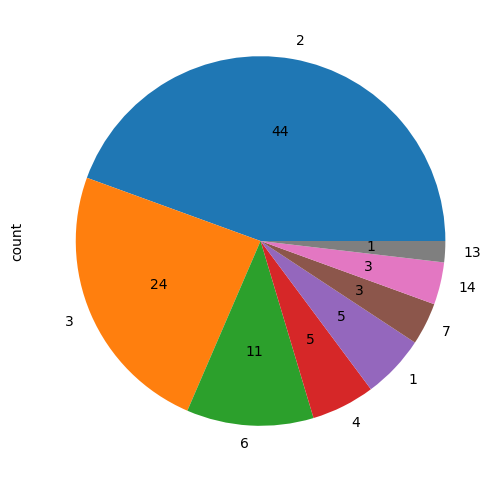

In [11]:
college_counts.plot(kind="pie", figsize=(6,6), autopct="%d")

In [12]:
college_percentage = (college_counts / len(data) * 100).round(2)
percentage_copy = college_percentage
college_summary = pd.DataFrame({"College": college_counts.index, "Frequency": college_counts.values, "Percentage": college_percentage.values})

college_counts_total = college_counts.sum()
college_percentage_total = college_percentage.sum().astype(str) + "%"

total_row = pd.DataFrame({"College": ["Total"], "Frequency": college_counts_total, "Percentage": college_percentage_total})
college_summary = pd.concat([college_summary, total_row], ignore_index=True)
college_summary

,College,Frequency,Percentage
0,2,24,44.44
1,3,13,24.07
2,6,6,11.11
3,4,3,5.56
4,1,3,5.56
5,7,2,3.7
6,14,2,3.7
7,13,1,1.85
8,Total,54,99.99%


In [13]:
data.head()

,ID,Age,Gender,College,Global score,Well-being,Self-Control,Emotionality,Sociability,BRS,TEI_Mean,BRS_Mean
0,1,18,Other,2,4.13,2.83,4.33,4.50,4.67,4.33,4.09,4.33
1,2,22,Female,2,3.57,3.83,3.67,2.63,4.33,3.00,3.61,3.00
2,3,22,Male,3,4.67,5.50,4.83,4.75,3.83,3.33,4.72,3.33
3,4,19,Female,2,5.10,5.17,4.83,5.13,5.00,3.50,5.05,3.50
4,5,23,Female,7,4.80,5.50,4.00,5.13,4.67,2.83,4.82,2.83


In [14]:
correlation = data["Self-Control"].corr(data["BRS"])
print(correlation)

0.5326317025557751


In [16]:
data.head()

,ID,Age,Gender,College,Global score,Well-being,Self-Control,Emotionality,Sociability,BRS,TEI_Mean,BRS_Mean
0,1,18,Other,2,4.13,2.83,4.33,4.50,4.67,4.33,4.09,4.33
1,2,22,Female,2,3.57,3.83,3.67,2.63,4.33,3.00,3.61,3.00
2,3,22,Male,3,4.67,5.50,4.83,4.75,3.83,3.33,4.72,3.33
3,4,19,Female,2,5.10,5.17,4.83,5.13,5.00,3.50,5.05,3.50
4,5,23,Female,7,4.80,5.50,4.00,5.13,4.67,2.83,4.82,2.83


In [29]:
tei_stats = data["TEI_Mean"].describe()
tei_kurtosis_value = stats.kurtosis(data["TEI_Mean"])
tei_skew_value = stats.skew(data["TEI_Mean"])

def format_column(df, column_name, decimals=2, )

mean = tei_stats["mean"].round(2).astype(str) + "%"
min = tei_stats["min"].round(2).astype(str) + "%"
max = tei_stats["max"].round(2).astype(str) + "%"
std = tei_stats["std"].round(2).astype(str) + "%"
percentile_one = tei_stats["25%"].round(2).astype(str) + "%"
percentile_two = tei_stats["50%"].round(2).astype(str) + "%"
percentile_three = tei_stats["75%"].round(2).astype(str) + "%"

tei_summary = pd.DataFrame({"Mean": mean, "Min": min, "Max": max, "STD": std, "25% Percentile": percentile_one, "50% Percentile": percentile_two, "75% Percentile": percentile_three}, index=["Summary"])

tei_summary

,Mean,Min,Max,STD,25% Percentile,50% Percentile,75% Percentile
Summary,4.75%,2.77%,6.51%,0.86%,4.3%,4.74%,5.33%
